In [ ]:
# здесь нужно будет добавить все импорты
import networkx as nx
import argparse

In [ ]:
def parser(file_, verbose=0):
    GATES = ['not', 'and', 'or', 'nand', 'nor', 'xor', 'xnor', 'buf', 'assign']
    # all input ports are taken as nodes to visualize better
    input_nodes = []
    # all output ports are taken as nodes to visualize better
    output_nodes = []
    # nodes
    gates = []
    # [edges][(tail, head)] here the first index is the name of the wire;
    # tail and head are the nodes to which the edge is connected to
    wires = []

    v_file = open(file_, 'r')
    n = 0
    line = v_file.readline()
    while line:
        # remove all leading spaces
        line = line.lstrip()

        if line.startswith('//') or line.startswith('module'):
            pass
        elif line.startswith('input'):
            # find all the input ports
            line = line.lstrip('input').split(sep=',')[:-1]
            line = [x.strip(',;\n ') for x in line]
            input_nodes.extend(line)
        elif line.startswith('output'):
            # find all the output ports
            line = line.lstrip('output').split(sep=',')
            line = [x.strip(',;\n ') for x in line]
            output_nodes.extend(line)
        elif line.startswith('assign'):
            gate = 'assign' + str(n)
            n += 1
            gates.append(gate)

            line = ''.join(line.split(' ')[1:])[:-1]
            line = (line[:-1]).split('=')

            _output = line[0]
            _input = line[1:]

            if _output in output_nodes:
                wires.append([_output, gate, [_output]])
            else:
                flag = False
                for i in wires:
                    if i[0] == _output:
                        i[1] = gate
                        flag = True
                        break
                if not flag:
                    wires.append([_output, gate, []])

            for i in _input:
                # print(i, end='')
                if i in input_nodes:
                    flag = False
                    for j in wires:
                        if j[0] == i:
                            j[2].append(gate)
                            flag = True
                            break
                    if not flag:
                        wires.append([i, i, [gate]])
                else:
                    flag = False
                    for j in wires:
                        if j[0] == i:
                            j[2].append(gate)
                            flag = True
                            break
                    if not flag:
                        wires.append([i, ' ', [gate]])
        elif any(g in line for g in GATES):
            # find all the connections and gates

            # remove gate type (gate instantiation) from line
            stri = ''
            line = (line.split(sep=' ', maxsplit=1))
            g = line[0]
            line = line[1:]
            line = stri.join(line)

            # extract gate name from line, append to gates and remove from line
            line = line.split('(')
            gate = g + str(n) + (line[0]).strip(',;\n ()')
            n = n + 1
            gates.append(gate)
            line = line[1:]

            # extract input and output ports of gate and append wires
            stri = ''
            line = stri.join(line)
            line = [x.strip(',;\n ()') for x in line.split(',')]
            _output = line[0]
            _input = line[1:]


            # print(_output, _input)
            # checking if a wire exists in wires with name _output and adding its edge parameters
            if _output in output_nodes:
                wires.append([_output, gate, [_output]])
            else:
                flag = 0
                for i in wires:
                    if(i[0] == _output):
                        i[1] = gate
                        flag = 1
                        break

                if flag == 0:
                    wires.append([_output, gate, []])

            for i in _input:
                # print(i, end='')
                if i in input_nodes:
                    flag = 0
                    for j in wires:
                        if j[0] == i:
                            j[2].append(gate)
                            flag = 1
                            break
                    if flag == 0:
                        wires.append([i, i, [gate]])

                else:
                    flag = 0
                    for j in wires:
                        if(j[0] == i):
                            j[2].append(gate)
                            flag = 1
                            break

                    if flag == 0:
                        wires.append([i, ' ', [gate]])

        line = v_file.readline()

    return input_nodes, output_nodes, gates, wires

In [ ]:
def grapher(in_n, out_n, nodes, edges):

    # in_n, out_n, nodes, edges = verilog_parser.parser(file_)

    G=nx.DiGraph()
    G.add_nodes_from(in_n)
    G.add_nodes_from(out_n)
    G.add_nodes_from(nodes)


    for i in edges:
        for j in i[2]:
            G.add_edge(i[1], j)

    return G

In [ ]:
def main():
    in_n, out_n, nodes, edges = parser('/content/circuit_032563.v') # файл на verilog нужно подгрузить в коллаб
    G = grapher(in_n, out_n, nodes, edges)
    return(G)
    # print(G.nodes())
    # print(G.edges())

    # for n, nbrsdict in G.adjacency():
    #     print(n, end=": ")
    #     for nbr, eattr in nbrsdict.items():
    #         print(nbr, end=' ')

    #     print()
    # print(type(G))

In [ ]:
gr = main()

In [ ]:
options = {
    'node_color': 'yellow',     # color of node
    'node_size': 300,          # size of node
    'width': 1,                 # line width of edges
    'arrowstyle': '-|>',        # array style for directed graph
    'arrowsize': 18,            # size of arrow
    'edge_color':'blue',        # edge color
    'font_size' : 8
}

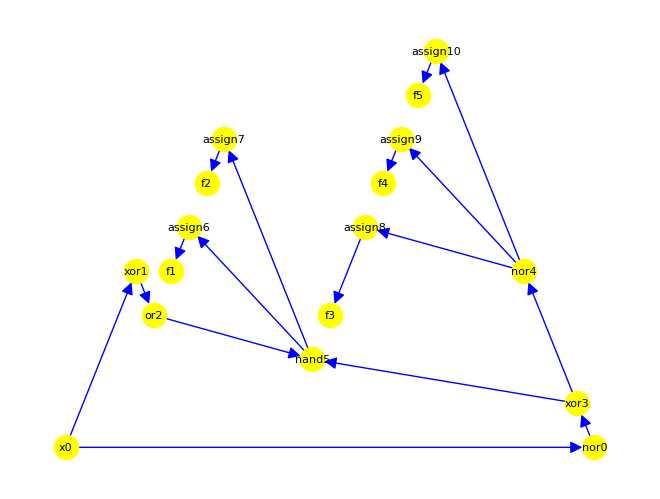

In [ ]:
nx.draw(gr,pos=nx.planar_layout(gr), with_labels = True, arrows=True, **options)

Далее блок с Node2Vec

In [ ]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import networkx as nx
from node2vec import Node2Vec

In [ ]:
# FILES
EMBEDDING_FILENAME = '/content/emb.txt'
EMBEDDING_MODEL_FILENAME = '/content/model.model'

# Create a graph
graph = main()

# Precompute probabilities and generate walks
node2vec = Node2Vec(graph, dimensions=4, walk_length=3, num_walks=20, workers=4)

## if d_graph is big enough to fit in the memory, pass temp_folder which has enough disk space
# Note: It will trigger "sharedmem" in Parallel, which will be slow on smaller graphs
#node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4, temp_folder="/mnt/tmp_data")

# Embed
model = node2vec.fit(window=4, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model.wv.most_similar(2)  # Output node names are always strings

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]